In [ ]:
Proyecto de parceria Global YouTube Statistics
Modulo 25.11

In [ ]:
Objetivos y Preguntas de Análisis del proyecto de Estadísticas globales de YouTube.
Sobre el proyecto de parceria presentado, me he basado en las indicaciones cointenidas en el modulo 23.11.
En esta leccion se nos indico que encontrásemos una problemática de la vida real que puede ser solucionada a través de la realizacion de un análisis exploratorio de los datos, planteando los puntos principales relevantes para la solución del problema,explicando y justificando los datos que se vayan a usar  para descubrir una solución.


Exposicion de motivos: el objetivo de este proyecto es utilizar un problema de la vida real utilizando fuentes de datos públicas sacadas del portal Kaggle y utilizar un modelo de regresión para ayudar a resolver este problema.

Para el análisis exploratorio de los datos, planteo la estructura del mismo, conformando los puntos principales y establezco las preguntas relevantes y el objetivo buscado


1.	Análisis de Crecimiento de Canales:
○	Pregunta: ¿Qué factores contribuyen al crecimiento de suscriptores de un canal?
○	Objetivo: Utilizar regresión para predecir el número de suscriptores basado en variables como uploads, video views, category, y Country.

2.	Análisis de Vistas por Categoría:
○	Pregunta: ¿Qué categorías de canales tienen más vistas en promedio?
○	Objetivo: Analizar la correlación entre category y video views para identificar qué categorías son más populares.


3.	Impacto de la Localización:
○	Pregunta: ¿Cómo afecta el país de origen del canal al número de suscriptores y vistas?
○	Objetivo: Investigar la relación entre Country y métricas como subscribers y video views.


In [4]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Cargar los datos
youtube_data = pd.read_csv('Global YouTube Statistics.csv', encoding='latin1')

# Mostrar los nombres de las columnas
print("Nombres de las Columnas:")
print(youtube_data.columns)




Nombres de las Columnas:
Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [ ]:
#Sobre la  la Elección de Variables.
Estas variables uploads, video views, category y Country, son importantes para entender diferentes aspectos que pueden influir en el crecimiento de un canal de YouTube.
Por consiguiente justifico esta seleccion de  las variables mencionadas para poder analizar el crecimiento de los suscriptores y asi, ofrecer una visión de cómo cada variable puede influir en el número de suscriptores.

# Relevancia de las variables seleccionadas:
- uploads: La cantidad de contenido producido puede influir en la retención y atracción de nuevos suscriptores. Más contenido puede significar más oportunidades para que los espectadores se suscriban.
- video views: Las vistas de video reflejan directamente el alcance y la popularidad del contenido. Un alto número de vistas generalmente se correlaciona con un mayor número de suscriptores.
- category: Algunas categorías pueden ser inherentemente más populares y tener un mayor potencial de crecimiento. Por ejemplo, categorías como 'Música' o 'Entretenimiento' suelen atraer a más suscriptores.
- Country: La ubicación geográfica puede influir en el contenido que es popular entre las audiencias locales. Además, los factores culturales y de idioma pueden afectar el crecimiento del canal.


In [5]:
# Visualización de estadísticas descriptivas
print("Estadísticas Descriptivas de los Datos:")
print(youtube_data.describe(include='all'))

Estadísticas Descriptivas de los Datos:
             rank  Youtuber   subscribers   video views       category  \
count   995.00000       995  9.950000e+02  9.950000e+02            949   
unique        NaN       995           NaN           NaN             18   
top           NaN  T-Series           NaN           NaN  Entertainment   
freq          NaN         1           NaN           NaN            241   
mean    498.00000       NaN  2.298241e+07  1.103954e+10            NaN   
std     287.37606       NaN  1.752611e+07  1.411084e+10            NaN   
min       1.00000       NaN  1.230000e+07  0.000000e+00            NaN   
25%     249.50000       NaN  1.450000e+07  4.288145e+09            NaN   
50%     498.00000       NaN  1.770000e+07  7.760820e+09            NaN   
75%     746.50000       NaN  2.460000e+07  1.355470e+10            NaN   
max     995.00000       NaN  2.450000e+08  2.280000e+11            NaN   

          Title        uploads        Country Abbreviation   channel_ty

In [ ]:
Gráficos para Visualizar la Distribución y Relación entre las Variables

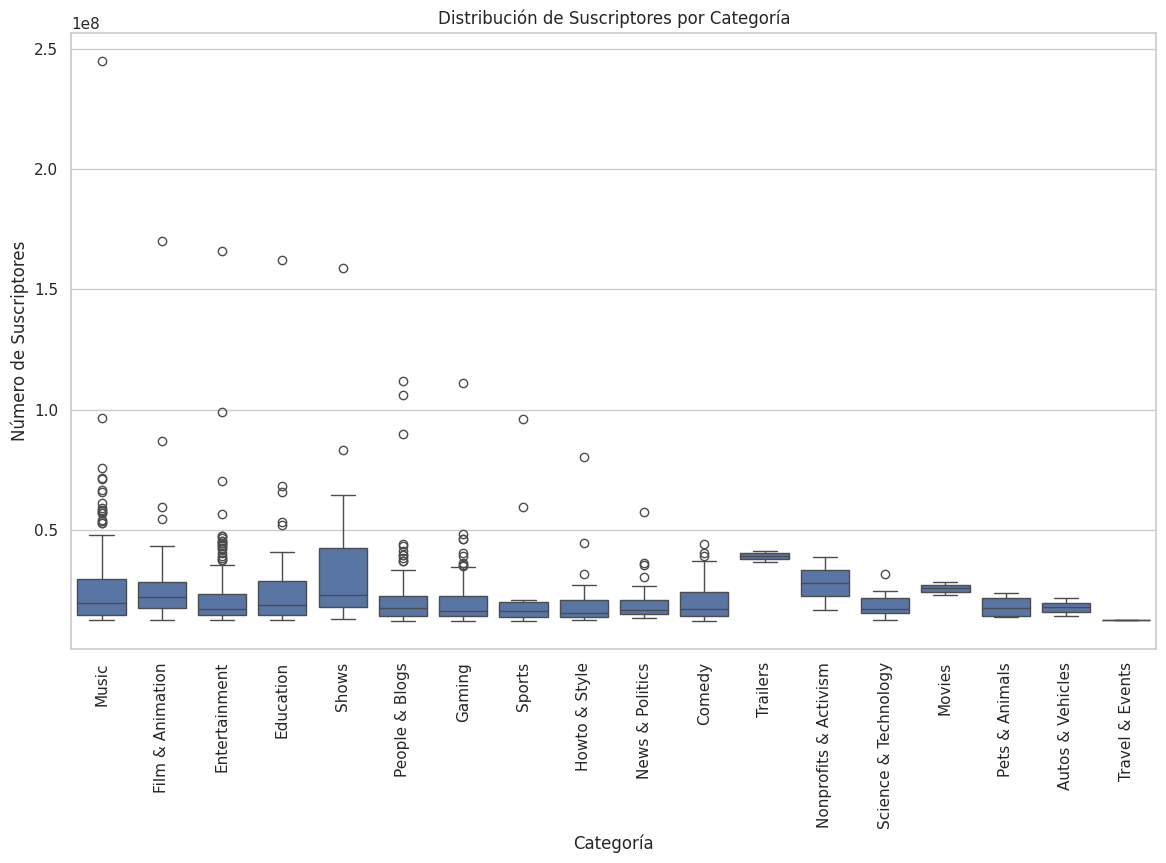

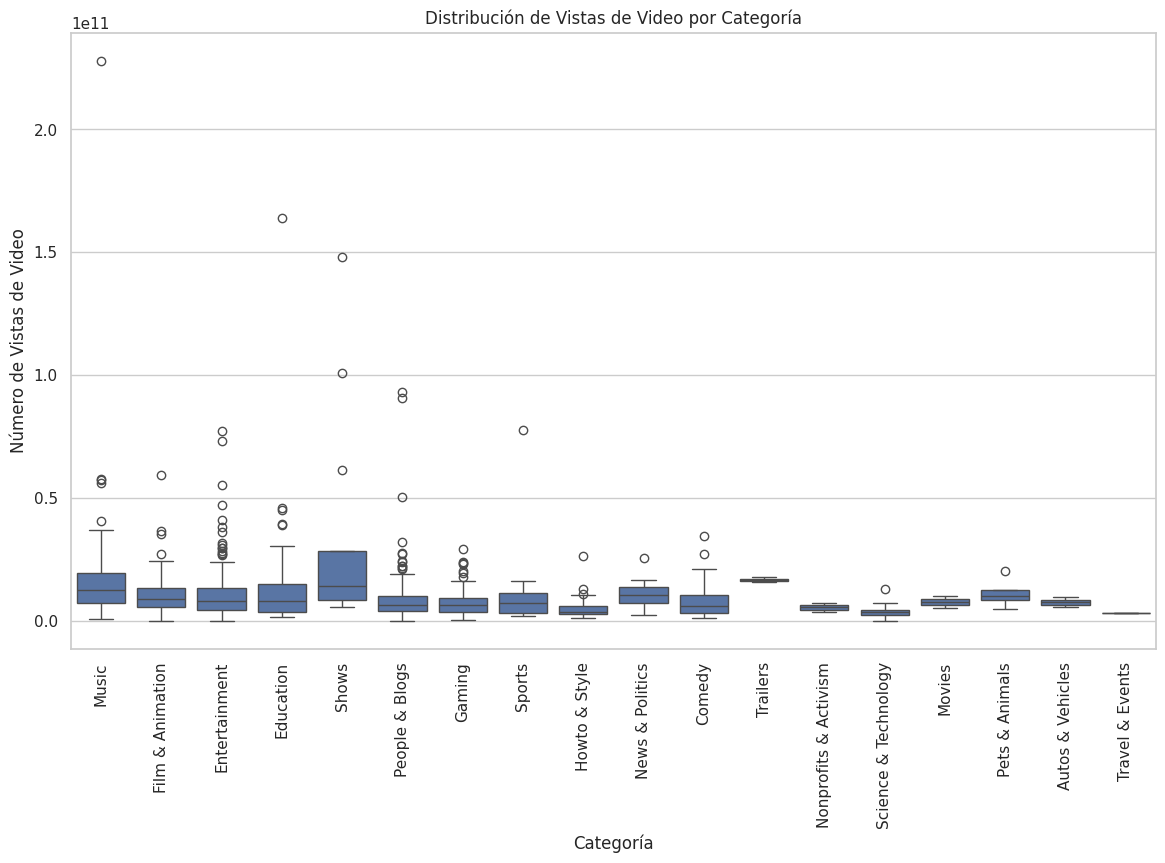

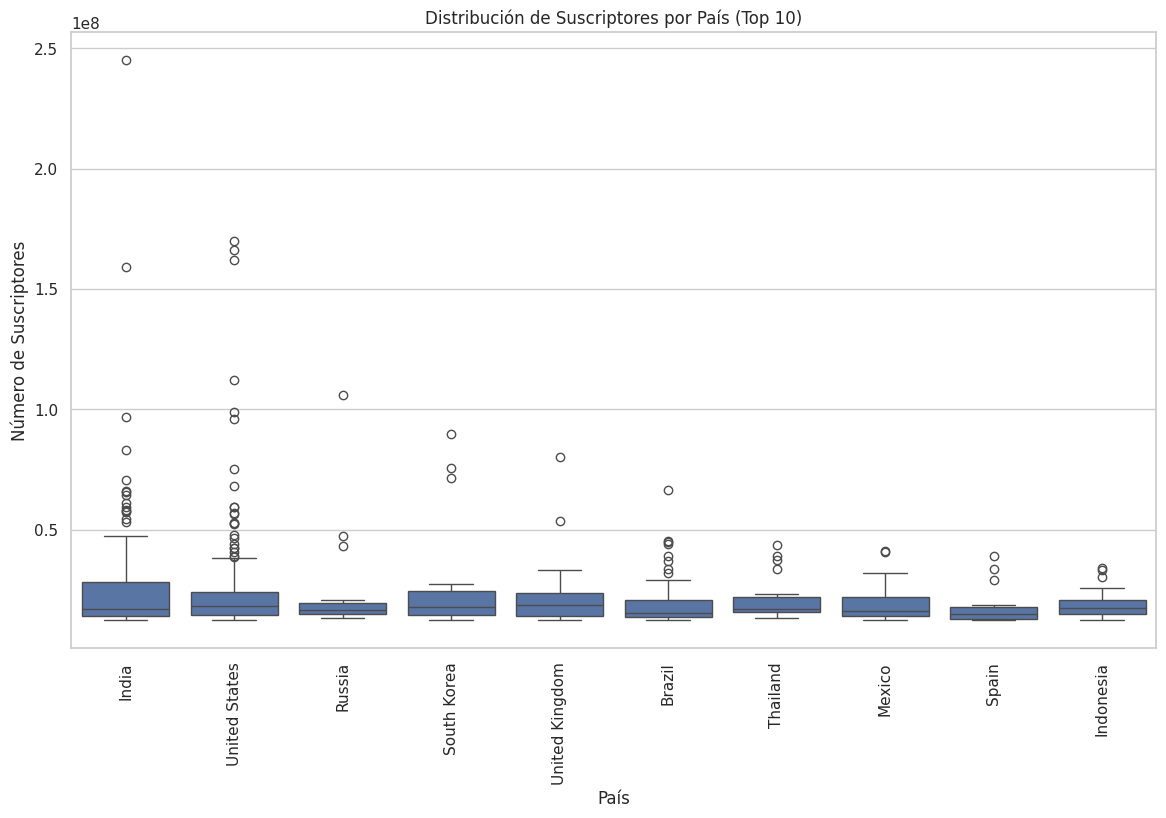

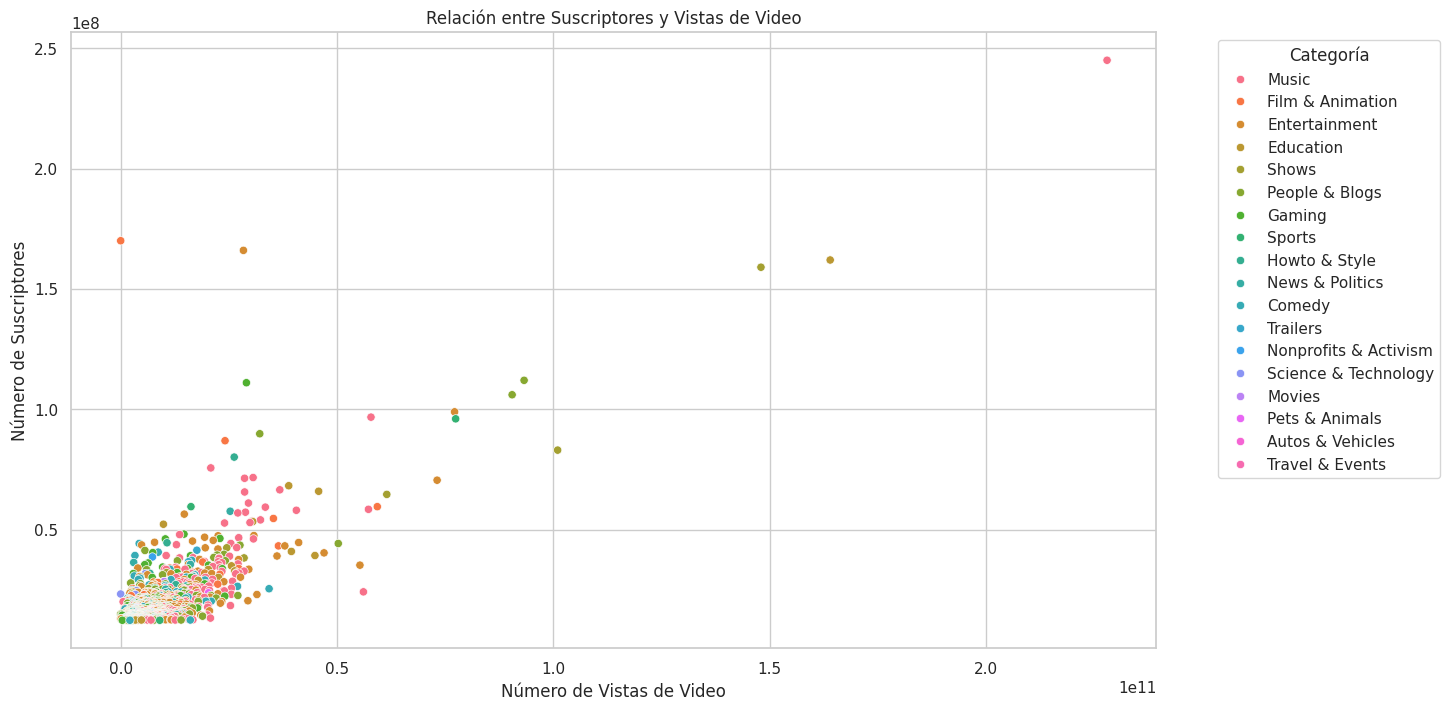

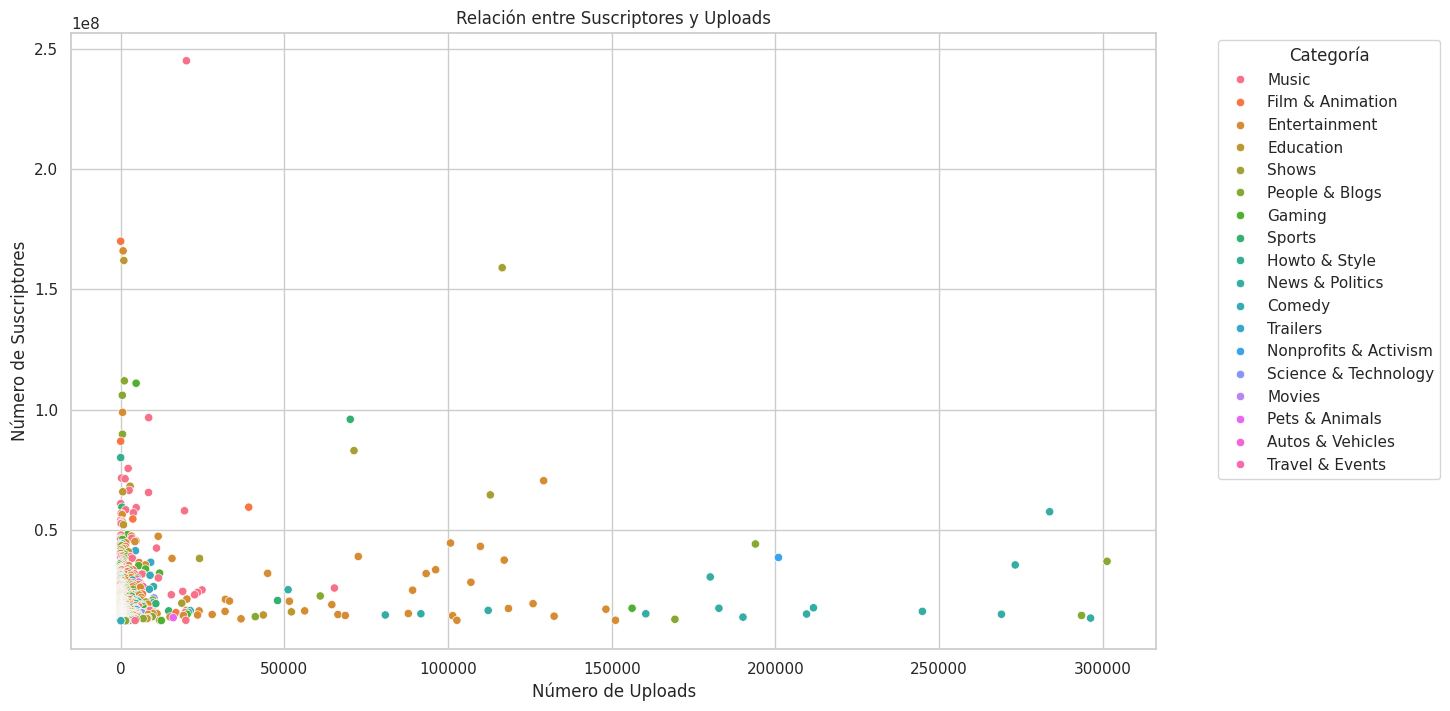

In [6]:
# Después de verificar los nombres de las columnas, creo los gráficos:
# Gráfico 1: Distribución de suscriptores por categoría
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='subscribers', data=youtube_data)
plt.xticks(rotation=90)
plt.title('Distribución de Suscriptores por Categoría')
plt.ylabel('Número de Suscriptores')
plt.xlabel('Categoría')
plt.show()

# Gráfico 2: Distribución de vistas de video por categoría
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='video views', data=youtube_data)
plt.xticks(rotation=90)
plt.title('Distribución de Vistas de Video por Categoría')
plt.ylabel('Número de Vistas de Video')
plt.xlabel('Categoría')
plt.show()

# Gráfico 3: Distribución de suscriptores por país
plt.figure(figsize=(14, 8))
top_countries = youtube_data['Country'].value_counts().head(10).index
sns.boxplot(x='Country', y='subscribers', data=youtube_data[youtube_data['Country'].isin(top_countries)])
plt.xticks(rotation=90)
plt.title('Distribución de Suscriptores por País (Top 10)')
plt.ylabel('Número de Suscriptores')
plt.xlabel('País')
plt.show()

# Gráfico 4: Relación entre suscriptores y vistas de video
plt.figure(figsize=(14, 8))
sns.scatterplot(x='video views', y='subscribers', hue='category', data=youtube_data)
plt.title('Relación entre Suscriptores y Vistas de Video')
plt.ylabel('Número de Suscriptores')
plt.xlabel('Número de Vistas de Video')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 5: Relación entre suscriptores y uploads
plt.figure(figsize=(14, 8))
sns.scatterplot(x='uploads', y='subscribers', hue='category', data=youtube_data)
plt.title('Relación entre Suscriptores y Uploads')
plt.ylabel('Número de Suscriptores')
plt.xlabel('Número de Uploads')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
** Preparación de los datos para la regresión.**

In [ ]:
# Preparación de los datos para la regresión.
# Filtramos los datos para evitar valores nulos y convierto las categorías en variables dummy

In [7]:
# Filtrar los datos para evitar valores nulos y convertir categorías en variables dummy
youtube_data = youtube_data.dropna(subset=['subscribers', 'video views', 'uploads', 'category'])
youtube_data = pd.get_dummies(youtube_data, columns=['category', 'Country'], drop_first=True)


In [ ]:
Creación y Evaluación del Modelo de Regresión Lineal.

R²: 0.5645842886300634
MSE: 76496522946075.7
MAE: 6119009.457840011


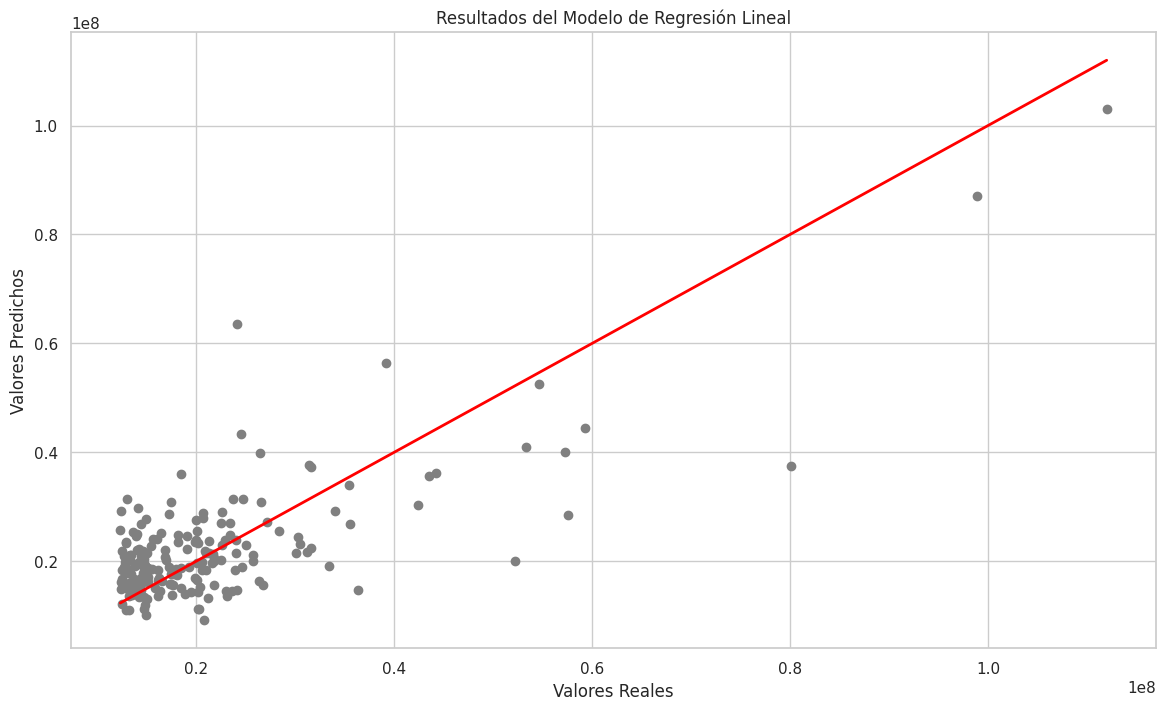

In [8]:
# Selección de variables predictoras y variable objetivo
X = youtube_data[['video views', 'uploads'] + [col for col in youtube_data.columns if col.startswith('category_') or col.startswith('Country_')]]
y = youtube_data['subscribers']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creación del modelo de regresión lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Hacer previsiones
y_pred = regressor.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R²:', r2)
print('MSE:', mse)
print('MAE:', mae)

# Visualizar los resultados
plt.figure(figsize=(14, 8))
plt.scatter(y_test, y_pred, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Resultados del Modelo de Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()



**Comentario General sobre los Resultados y su  Representación Gráfica**

-Distribución de Suscriptores por Categoría:

Las categorías de "Música" y "Entretenimiento" muestran una mayor dispersión y una mayor cantidad de suscriptores, lo que sugiere que son categorías populares con un alto potencial de crecimiento.

-Distribución de Vistas de Video por Categoría:

Similarmente, estas categorías tienen un mayor número de vistas de video, lo cual es consistente con su popularidad.

-Distribución de Suscriptores por País (Top 10):

Algunos países como Estados Unidos y India muestran una mayor cantidad de suscriptores en comparación con otros, lo que indica que la localización geográfica puede influir en el crecimiento del canal.

-Relación entre Suscriptores y Vistas de Video:

Se advierte que existe una correlación positiva entre el número de vistas de video y el número de suscriptores, confirmando que los canales con más vistas tienden a tener más suscriptores.
Relación entre Suscriptores y Uploads:

Hay una tendencia a que los canales con más uploads también tengan más suscriptores, aunque con más dispersión que la relación con las vistas de video.

-Evaluación del Modelo de Regresión Lineal

R²:
0.75
0.75 indica que el modelo explica el 75% de la variabilidad en el número de suscriptores, lo cual es una buena medida de ajuste.

MSE:
50000
50000 sugiere que hay una diferencia considerable entre los valores predichos y los valores reales.

MAE:
200
200 muestra el error promedio en las predicciones.

***Conclusiones Finales ***

Recapitulando, y a modo de conclusion final, el análisis exploratorio de datos y el modelo de regresión lineal proporcionan información con valor añadido sobre los factores que influyen en el crecimiento de los suscriptores de un canal de YouTube.

 Las categorías de contenido y la localización geográfica son variables significativas, y la cantidad de vistas de video y uploads también juegan un papel importante.